# Plot Runtime Dependence on Core Count Within Single CPU

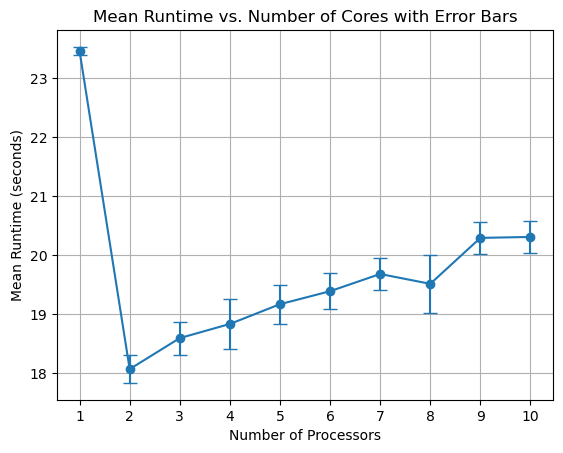

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def read_runtime_data(file_path):
    """
    Reads the runtime data from a file and organizes it by the number of processors.
    
    Args:
    file_path (str): The path to the file containing runtime data.
    
    Returns:
    dict: An array where rows are the number of runs and columns correspond to runtime.
    """
    data = {}
    data_array = np.zeros((5,10))
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            parts = line.strip().split('\t')
            data_array[i] = parts[1:]
            # if not parts[0] in data:
            #     data[parts[0]] = []  # Initialize the list for this np if it doesn't exist
            # for i, a_part in enumerate(parts):
            #     print(i)  # Debugging print to observe index and part
            #     if i != 0:  # Skip the first part as it's the key
            #         data[parts[0]].append(float(a_part))  # Append runtime as float to ensure numeric processing later
    return data_array

def compute_statistics(data_array):
    """
    Computes the mean and standard deviation of runtime for each processor count.
    
    Args:
    data_array (nparray): (row,col)=(num_runs, num_processors)
    
    Returns:
    tuple: Two lists, one with mean runtimes and another with standard deviations, both indexed by processor count.
    """
    means = []
    std_devs = []
    means = np.mean(data_array,axis=0)
    std_devs = np.std(data_array,axis=0)
    return means, std_devs

def plot_runtimes(means, std_devs):
    """
    Plots the mean runtimes with standard deviation error bars and connects means with lines.
    
    Args:
    np_values (list): The sorted list of processor counts.
    means (list): The list of mean runtimes.
    std_devs (list): The list of standard deviations.
    """
    plt.errorbar(1+np.array(range(len(means))), means, yerr=std_devs, fmt='-o', capsize=5)
    plt.xlabel('Number of Processors')
    plt.ylabel('Mean Runtime (seconds)')
    plt.title('MEEP Mean Runtime vs. Number of Cores with Error Bars')
    plt.grid(True)
    # Set x-axis ticks to display every integer from 1 to 10
    plt.xticks(range(1, 11))
    plt.savefig("runtimes_vs_core_count.png")
    plt.show()

# Example usage
file_path = 'meep_runtimes.txt'  # Replace with your actual file path
data_array = read_runtime_data(file_path)
means, std_devs = compute_statistics(data_array)
plot_runtimes(means, std_devs)
